<a href="https://colab.research.google.com/github/CS-Edwards/machine_learning/blob/main/C_Edwards_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Candace Edwards
### ICS 635: Homework 2
### [Notebook Link](https://colab.research.google.com/drive/17jB_AujrJjLQJc08NjXXA3XoPwX51u5N?usp=sharing)

In [35]:
###
### Import dependencies. Do not change. For reference only.
###

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

In [37]:
###
### Load the California Housing dataset.
###

data = fetch_california_housing(return_X_y=True)

X = data[0]
y = data[1]

# Only use 50% of the data.
X = X[:int(X.shape[0] / 2)]
y = y[:int(y.shape[0] / 2)]

In [38]:
###
### Split data into train and test sets. Do not change. For reference only.
###

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [39]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(7740, 8)


In [51]:
###
### Random Forest Regression Model
### 


def get_regression_model():
  """
  Define and return the machine learning model. 
  """
  from sklearn.ensemble import RandomForestRegressor
  model = RandomForestRegressor(criterion='friedman_mse',
                                max_features='log2',
                                n_estimators= 1000)
  return model

In [52]:
###
### Train and evaluate the model.
###

model = get_regression_model()

fit = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Mean Squared Error:  0.19944631043400374




---



---



**ElasticNet:** RandomSearchCV and GridSearchCV

In [48]:
## Random Seach CV and Grid Search CV for ElasticNet()

model = ElasticNet()

h_param_dict = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
              'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0],
              'max_iter':[1000,2000,3000,4000],
              'fit_intercept': [True, False],
               }

random_search = RandomizedSearchCV(model, param_distributions=h_param_dict,
                                   n_iter=20, scoring='neg_mean_squared_error',
                                   n_jobs=-1, cv=5, random_state=42)

random_search.fit(X_train, y_train)

print("Random Optimal Params:", random_search.best_params_)
print("MSE:", -random_search.best_score_)

Random Optimal Params: {'max_iter': 2000, 'l1_ratio': 0.25, 'fit_intercept': True, 'alpha': 1.0}
MSE: 0.6844326571352379


In [50]:
# Commented Out: Long Runtime ~8mins
# #array of 10 values between 0 and 1
# l1_ratio = np.linspace(0,1,10)

# #array of 20 values between 0.1 and 0.5
# alpha_range =  np.linspace(0.1,0.5,20)

# h_param_grid_dict = {'alpha': alpha_range,
#               'l1_ratio': l1_ratio,
#               'max_iter':[1000,1500,2000],
#               'fit_intercept': [True, False]}

# # GridSearch: cv = 10fold cross validation, verbose messaging, scoring MSE
# grid_search = GridSearchCV(model, param_grid=h_param_grid_dict,
#                            scoring='neg_mean_squared_error',
#                            cv=10,
#                            verbose = 3,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Grid Optimal Params:", grid_search.best_params_)
# print("MSE:", -grid_search.best_score_)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
Grid Optimal Params: {'alpha': 0.24736842105263157, 'fit_intercept': True, 'l1_ratio': 1.0, 'max_iter': 1000}
MSE: 0.6362219937950655


**RandomForestRegressor:** RandomSearchCV and GridSearchCV

In [44]:
##Commented Out : Long Runtime ~18min
## Random Seach CV and Grid Search CV for RandomForestRegressor()
# model = RandomForestRegressor()

# h_param_dict = {'n_estimators': [1,10,100,1000], #[1000]
#               'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#               'max_features':['sqrt', 'log2','None'],
#               'ccp_alpha': [0.0, 0.0001,0.001,0.01,1], #[0,0]
#                }

# random_search = RandomizedSearchCV(model, param_distributions=h_param_dict,
#                                    n_iter=20, scoring='neg_mean_squared_error',
#                                    n_jobs=-1, cv=5, random_state=42)

# random_search.fit(X_train, y_train)

# print("Random Optimal Params:", random_search.best_params_)
# print("MSE:", -random_search.best_score_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Optimal Params: {'criterion': 'friedman_mse'}
MSE: 0.2175666734317699


In [47]:
# Commented Out: Long Runtime ~24min
# model = RandomForestRegressor()
# h_param_grid_dict = {'n_estimators': [1,10,100,1000],
#               'criterion': ['squared_error', 'friedman_mse'],
#               'max_features':['sqrt', 'log2','auto']             
#                }

# # GridSearch: cv = 10fold cross validation, verbose messaging, scoring MSE
# grid_search = GridSearchCV(model, param_grid=h_param_grid_dict,
#                            scoring='neg_mean_squared_error',
#                            cv=10,
#                            verbose = 3,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Grid Optimal Params:", grid_search.best_params_)
# print("MSE:", -grid_search.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Grid Optimal Params: {'criterion': 'friedman_mse', 'max_features': 'log2', 'n_estimators': 1000}
MSE: 0.19786896386648242


In [ ]:
#Best Performance
#Grid Optimal Params: {'criterion': 'friedman_mse', 'max_features': 'log2', 'n_estimators': 1000}
#MSE: 0.197729487957309

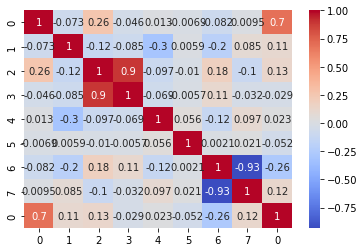

In [60]:
##Correlation Between Features of DataSet
import seaborn as sns
import matplotlib.pyplot as plt

x_train_df = pd.DataFrame(X_train)
y_train_series = pd.Series(y_train)

training = pd.concat([x_train_df, y_train_series], axis=1)
matrix = training.corr()
#matrix

sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()





---



---



# REPORT: Hyperparameter Tuning Summary

**Best Performing Solution:** Random Forest Regression <br>
**Best MSE:** `0.197729487957309`

**Performance Conjecture:** <br>
The heatmap above illustrates the low correlation of the dataset features. Non-linear models fit low correlated features better than linear models. Non-linear models can capture more complex relationships between features in the training data which improves the model. Random Forrest regression probably performed better than the other non-linear models because the model makes mutiple decision trees and takes the average; which helps to limit overfitting. In my model `n_estimator = 1000` , to increase the accuracy of the model at the cost of computation time. 

**Models and Methods:** <br>
In the first iteration of this experiment I used linear regression models:Linear Regression, Ridge Regression, Lasso Regression and Elastic-Net Regression to find the best performing classifier and hyperparameters for the data. Linear Regression was used first to establish an MSE baseline. Linear Regression resulted in an initial MSE of 
~0.55. With the baseline satisfying the assignment condition of returning an MSE < 0.6, I then experimented with tuning the other regression methods to perform *atleast* as well as the base.

After modeling the data with linear models, I moved on to non-linear models: Descision Tree Regression, Random Forest Regression and Gradient Boost; with the goal of improving model fit performance and decreasing MSE.

**Hyperparameter Tuning Approach: Linear Models** <br>
<li> Manual Alpha Tuning for Ridge and Lasso Regression: <br> First, each classifier model (Linear, Ridge and Lasso) was fit to the data using their default settings and compared the resulting MSE to the linear regression base MSE. Then, I selected 10 values of alpha at observe the impact of the classifier sensativity on the fit and compared the resulting MSE to both the Linear Regression base and the default values of the classifier. After experimenting with a few abritraty values for alpha it became apprent that the best performing values were somewhere between [0,1). In the best performing Ridge Regression with alpha set to 1.0 x 10<sup>-14</sup> the MSE was equivalent to the base Linear Regression MSE until the 10<sup>-16</sup> decimal place, where Linear Regression performed slightly better. In the best performing Lasso Regression with alpha set to 5.0 x 10<sup>-16</sup> the MSE was equivalent to the base Linear Regression MSE until the 10<sup>-15</sup> decimal place, where Linear Regression performed slightly better.The results are recorded in tables below.
<br>
<br>
<li> RandomSearchCV and GridSearchCV for ElasticNet Regression:<br>
To experiment with the ElasticNet Regression classifier, I first used RandomSearchCV with a wide range of values for the hyperparameters to get an idea of which settings produced the optimal result. The alpha array values range is [0.01,100] to evaluate which magnitude performed the best. The l1 ratio range is [0.0,1], again so evaluate which ratio performed the best in the RandomSearch. Once RandomSearch provided the optimal hyperparameters for the parameter dictionary, I used the RandomSearch optimal parameters to inform the paramaters I chose for GridSearchCV. Given the RandomSearch CV optimal values:

```
Random Optimal Params: {'max_iter': 2000, 'l1_ratio': 0.25, 'fit_intercept': True, 'alpha': 1.0}
MSE: 0.6844326571352379
```
I set the hyperparemeters of grid search narrowly around the hyperparemeters of RandomSearch:

```
#array of 10 values between 0 and 1
l1_ratio = np.linspace(0,1,10)

#array of 20 values between 0.1 and 0.5
alpha_range =  np.linspace(0.1,0.5,20)

h_param_grid_dict = {'alpha': alpha_range,
              'l1_ratio': l1_ratio,
              'max_iter':[1000,1500,2000],
              'fit_intercept': [True, False]}
```

GridSearch CV resulted in the following for ElasticNet():

```
Best hyperparameters: {'alpha': 0.24736842105263157, 'fit_intercept': True, 'l1_ratio': 1.0, 'max_iter': 1000}
Mean test score (MSE): 0.6367222633986992
```

**Using linear regression models, Linear Regression(), performed the best and produced the lowest MSE.** 

<br>
<br>

**Hyperparameter Tuning Approach: Non-Linear Models** <br>
For the non-linear models, I first fit each model using their default settings. All of the models performed significantly better than the Linear Regression classifier.

| Model    | MSE| change vs LinearRegression()|      
| :---        |    :----:   |          ---: |
|Linear Regression|0.555157420181748|0.000%|
|Decision Tree Regression|0.40596759394957366|-26.873%|
|Random Forest Regression|0.2119276267504992|-61.826%|
|Gradient Boost Regression|0.25105791245810666|-54.777%|

The best performing classifiers for this data is the Random Forest Regression.
<br>

Similar to my approach above, I used RandomSearchCV to establish hyperparameter bounds and then used GridSearchCV to find the optimal hyperparameters for Random Forest Regression. Given the RandomSearch CV optimal values:

```
Random Optimal Params: {'n_estimators':1000, 'criterion': 'friedman_mse', }
```

I paired down the hyperparamater options for GridSearchCV:

```
h_param_grid_dict = {'n_estimators': [1,10,100,1000],
               'criterion': ['squared_error', 'friedman_mse'],
               'max_features':['sqrt', 'log2','auto']             
                }
```

GridSearch CV resulted in the following for RandomForestRegressor():

```
Grid Optimal Params: {'criterion': 'friedman_mse', 'max_features': 'log2', 'n_estimators': 1000}
MSE: 0.197729487957309
```

I used these parameters to tune the model in the function `get_regression_model()`.

**Using non-linear regression models, RandomForestRegressor(), performed the best and produced the lowest MSE, overall.**


## Models


*   Linear Regression Models
*   Non-Linear Regression Models



### Linear Regression Models: 
<li> Linear Regression
<li> Ridge Regression
<li> Lasso Regression

In [8]:
def percent_difference(base, case_in):
  '''
  Calculate the percent change in MSE Results
  '''
  return ((case_in-base)/base) * 100

#### **Base Case:  Linear Regression**  <br>
Linear Regression model `from sklearn.linear_model import LinearRegression` with no alterations or adjustments to the default hyperparameter.

```
model = LinearRegression()
```

**Score:**

```
Mean Squared Error:  0.555157420181748
```

#### **Case 1: Linear Regression: Fit Intercept**  <br>
`fit_intercept` hyperparameter set to `False`. Setting the fit intercept to false dampened the performance of the model, increasing the MSE/ decreasing performance by ~7.6%. 

```
 model = LinearRegression(fit_intercept= False)
```

**Score:**

```
Mean Squared Error:  0.5974245036216438
```

Resource:<br>
Meaningful Regression Parameters Through Centering: [link](https://cscu.cornell.edu/wp-content/uploads/66_centering.pdf)

In [12]:
base_mse = 0.555157420181748
case_1 =  0.5974245036216438

print(f'Percent change vs base: {percent_difference(base_mse,case_1)}%')

Percent change vs base: 7.613531208149643%


#### **Case 2: Ridge Regression**  <br>
Ridge Regression model `from sklearn.linear_model import Ridge` with no alterations or adjustments to the default hyperparameter.Linear Regression perfomed nominally better than Ridge Regression with no hyperameter tuning. Ridge Regression increased MSE by < 0.01%.

```
model = Ridge()
```

**Score:**

```
Mean Squared Error:  0.5552074222040309

```

 **Ridge Alpha Tuning Outcome Summary**

| Alpha     | MSE| change vs Ridge()| change vs LinearRegression()     |
| :---        |    :----:   |          :---: |---: |
|2.0|0.555257389558855|0.009%|0.018%|
|10.0|0.5556556682896933|0.081%|0.090%|
|5.0|0.5554070651827038|0.036%|0.045%|
|3.0|0.5553073203708422|0.018%|0.027%|
|1.5|0.5552324103336082|0.005%|0.014%|
|0.01|0.5551579203672564|-0.009%|0.000%|
|0.0001|0.5551574251836195|-0.009%|0.000%|
|1e-06|0.5551574202317668|-0.009%|0.000%|
|3.05175e-06|0.5551574203343929|-0.009%|0.000%|
|1e-15|0.5551574201817483|-0.009%|0.000%|

##### Code Calculations:

In [27]:
case_2 =  0.5552074222040309
print(f'Percent change vs base: {percent_difference(base_mse,case_2)}%')

Percent change vs base: 0.009006818690547536%


In [28]:
#code for results table, output in markdown
alpha_ridge = [2.0,10.0,5.0,3.0,1.5,0.01,0.0001,0.000001,0.00000305175,0.000000000000001]

from sklearn.linear_model import Ridge

print('| Alpha     | MSE| change vs Ridge()| change vs LinearRegression()     |')
print('| :---        |    :----:   |          :---: |---: |')

for alpha in alpha_ridge:
   model = Ridge(alpha=alpha)
   fit = model.fit(X_train, y_train)

   y_pred = model.predict(X_test)
   mse = mean_squared_error(y_test, y_pred)
   delta_ridge = percent_difference(case_2,mse)
   delta_lr = percent_difference(base_mse,mse)
   print(f'|{alpha}|{mse}|{delta_ridge:.3f}%|{delta_lr:.3f}%|')


| Alpha     | MSE| change vs Ridge()| change vs LinearRegression()     |
| :---        |    :----:   |          :---: |---: |
|2.0|0.555257389558855|0.009%|0.018%|
|10.0|0.5556556682896933|0.081%|0.090%|
|5.0|0.5554070651827038|0.036%|0.045%|
|3.0|0.5553073203708422|0.018%|0.027%|
|1.5|0.5552324103336082|0.005%|0.014%|
|0.01|0.5551579203672564|-0.009%|0.000%|
|0.0001|0.5551574251836195|-0.009%|0.000%|
|1e-06|0.5551574202317668|-0.009%|0.000%|
|3.05175e-06|0.5551574203343929|-0.009%|0.000%|
|1e-15|0.5551574201817483|-0.009%|0.000%|


#### Case 3: Lasso Regression
Lasso Regression model `from sklearn.linear_model import Lasso` with no alterations or adjustments to the default hyperparameter. Linear Regression perfomed substantially better than Lasso Regression with no hyperameter tuning. Lasso Regression increased MSE by ~74%

```
model = Lasso()
```

**Score:**

```
Mean Squared Error:  0.9697723742711276

```

 **Lasso Alpha Tuning Outcome Summary**

| Alpha     | MSE| change vs Lasso()| change vs LinearRegression()     |
| :---        |    :----:   |          :---: |---: |
|10|1.3759644077914204|41.885%|147.851%|
|2|1.3762995217793714|41.920%|147.912%|
|1.5|1.361604547179291|40.405%|145.265%|
|5e-06|0.5551615369226126|-42.753%|0.001%|
|5e-09|0.5551574242983756|-42.754%|0.000%|
|5e-10|0.5551574205933917|-42.754%|0.000%|
|5e-11|0.5551574202229115|-42.754%|0.000%|
|5e-12|0.5551574201858652|-42.754%|0.000%|
|5e-13|0.5551574201821607|-42.754%|0.000%|
|5e-15|0.5551574201817531|-42.754%|0.000%|
|5e-14|0.5551574201817902|-42.754%|0.000%|

##### Code Calculations

In [24]:
base_mse = 0.555157420181748
case_3 =   0.9697723742711276

print(f'Percent change vs base: {percent_difference(base_mse,case_3):.3f}%')

Percent change vs base: 74.684%


In [26]:
#code for results table, output in markdown
alpha_lasso = [10, 2, 1.5, 0.000005,0.000000005, 0.0000000005,0.00000000005, 0.000000000005, 0.0000000000005,0.000000000000005, 0.00000000000005]

from sklearn.linear_model import Lasso

print('| Alpha     | MSE| change vs Lasso()| change vs LinearRegression()     |')
print('| :---        |    :----:   |          :---: |---: |')

for alpha in alpha_lasso:
   model = Lasso(alpha=alpha)
   fit = model.fit(X_train, y_train)

   y_pred = model.predict(X_test)
   mse = mean_squared_error(y_test, y_pred)
   delta_lasso = percent_difference(case_3,mse)
   delta_lr = percent_difference(base_mse,mse)
   print(f'|{alpha}|{mse}|{delta_lasso:.3f}%|{delta_lr:.3f}%|')


| Alpha     | MSE| change vs Lasso()| change vs LinearRegression()     |
| :---        |    :----:   |          :---: |---: |
|10|1.3759644077914204|41.885%|147.851%|
|2|1.3762995217793714|41.920%|147.912%|
|1.5|1.361604547179291|40.405%|145.265%|
|5e-06|0.5551615369226126|-42.753%|0.001%|
|5e-09|0.5551574242983756|-42.754%|0.000%|
|5e-10|0.5551574205933917|-42.754%|0.000%|
|5e-11|0.5551574202229115|-42.754%|0.000%|
|5e-12|0.5551574201858652|-42.754%|0.000%|
|5e-13|0.5551574201821607|-42.754%|0.000%|
|5e-15|0.5551574201817531|-42.754%|0.000%|
|5e-14|0.5551574201817902|-42.754%|0.000%|


### Non-Linear Regression
<li> Descision Tree Regression
<li> Random Forest Regression
<li> Gradient Boost Regression

#### **Case 4: Decision Tree Regression**  <br>
Ridge Regression model `from sklearn.tree import DecisionTreeRegressor` with no alterations or adjustments to the default hyperparameter. DTR performed significantly better than Linear Regression, reducing MSE by ~ 26.873%

```
model = DecisionTreeRegressor()
```

**Score:**

```
Mean Squared Error:  0.40596759394957366
```

#### **Case 5: Random Forest Regression**  <br>
Random Forest Regression model `from sklearn.ensemble import RandomForestRegressor` with no alterations or adjustments to the default hyperparameter. RFR performed significantly better than Linear Regression, reducing MSE by ~ 61%.

```
model = RandomForestRegressor()
```

**Score:**

```
Mean Squared Error:  0.2119276267504992

```

#### **Case 6: Gradient Boost**  <br>
Ridge Regression model `from sklearn.ensemble import GradientBoostingRegressor` with no alterations or adjustments to the default hyperparameter. GB performed significantly better than Linear Regression, reducing MSE by ~ 54.777%


``` 
model = GradientBoostingRegressor()
```

**Score:**

```
Mean Squared Error:  0.25105791245810666

```

#### Code Calulations

In [32]:
dtr = 0.40596759394957366
rfr = 0.2119276267504992
gb = 0.25105791245810666

print(f'Descision Tree: Percent change vs base: {percent_difference(base_mse,dtr):.3f}%')
print(f'Random Forest: Percent change vs base: {percent_difference(base_mse,rfr):.3f}%')
print(f'Gradient Boost: Percent change vs base: {percent_difference(base_mse,gb):.3f}%')

Descision Tree: Percent change vs base: -26.873%
Random Forest: Percent change vs base: -61.826%
Gradient Boost: Percent change vs base: -54.777%


SANDBOX BELOW: do not grade


---



---



In [22]:
###
### Linear Regression Model
### 

# def get_regression_model():
#   """
#   Define and return the machine learning model.
#   """
#   from sklearn.linear_model import LinearRegression
#   model = LinearRegression()
#   return model

In [24]:
##
## Ridge Regression Model
## 

# def get_regression_model():
#   """
#   Define and return the machine learning model.
#   """
#   from sklearn.linear_model import Ridge
#   model = Ridge()
#   return model

In [16]:
###
### Lasso Regression Model
### 

# def get_regression_model():
#   """
#   Define and return the machine learning model.
#   """
#   from sklearn.linear_model import Lasso
#   model = Lasso()  #empty, 10, 2, 0.000005,0.000000005, 0.0000000005,0.00000000005, 0.000000000005, 0.0000000000005,0.000000000000005, 0.00000000000005, 0.000000000000001 --> Error
#   return model

In [61]:
###
### Decision Tree Regression Model
### 
##Mean Squared Error:  0.40596759394957366

# def get_regression_model():
#   """
#   Define and return the machine learning model. 
#   """
#   from sklearn.tree import DecisionTreeRegressor
#   model = DecisionTreeRegressor()
#   return model

In [65]:
###
### Gradient Boosting Regression Model
### 
##Mean Squared Error:  0.25105791245810666
# def get_regression_model():
#   """
#   Define and return the machine learning model. 
#   """
#   from sklearn.ensemble import GradientBoostingRegressor
#   model = GradientBoostingRegressor()
#   return model